In [77]:
import pandas as pd 
delivery_data = pd.read_csv("delivery_time.csv")

In [78]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [79]:
delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [80]:
delivery_data.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [81]:
delivery_data.mean()

Delivery_Time    16.790952
Sorting_Time      6.190476
dtype: float64

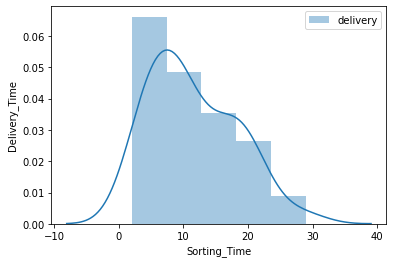

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(delivery_data,label = "delivery")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.legend()

In [83]:
delivery_data.skew()

Delivery_Time    0.352390
Sorting_Time     0.047115
dtype: float64

In [84]:
delivery_data.kurtosis()

Delivery_Time    0.317960
Sorting_Time    -1.148455
dtype: float64

In [85]:
sorting = delivery_data["Sorting_Time"]
delivery = delivery_data["Delivery_Time"]

In [86]:
delivery_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [88]:
import statsmodels.formula.api as smf
sm_model = smf.ols("delivery~sorting",data=delivery_data).fit()

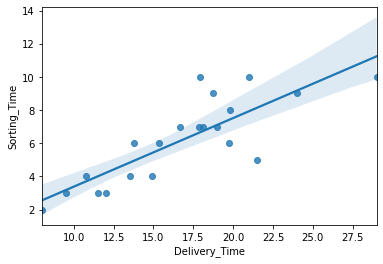

In [109]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data = delivery_data)

In [95]:
sm_model.params

Intercept   -0.756673
delivery     0.413744
dtype: float64

In [97]:
print(sm_model.pvalues)
print(sm_model.tvalues)

Intercept    0.512611
delivery     0.000004
dtype: float64
Intercept   -0.667290
delivery     6.387447
dtype: float64


In [98]:
print(sm_model.rsquared,sm_model.rsquared_adj) #rsquared values

0.6822714748417231 0.6655489208860244


In [99]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sorting   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        19:23:23   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery       0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
import numpy as np 
delivery_log = np.log(delivery)

In [106]:
import statsmodels.formula.api as smf
sm_model1 = smf.ols("delivery_log~sorting",data=delivery_data).fit()

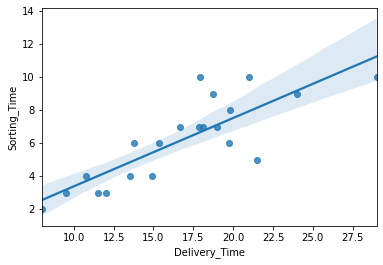

In [107]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data = delivery_data)

In [108]:
print(sm_model1.params)
print(sm_model1.pvalues)
print(sm_model1.tvalues)

Intercept    2.121372
sorting      0.105552
dtype: float64
Intercept    1.857343e-14
sorting      1.592708e-06
dtype: float64
Intercept    20.601357
sorting       6.836088
dtype: float64


In [110]:
#R squared values
print(sm_model1.rsquared,sm_model1.rsquared_adj)

0.7109478980584187 0.6957346295351776


In [111]:
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           delivery_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        19:54:04   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sorting        0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
delivery_sqrt = np.sqrt(delivery)

In [113]:
sm_model2 = smf.ols("delivery_sqrt~sorting",data = delivery_data).fit()

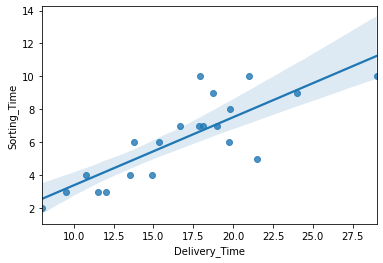

In [119]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data = delivery_data)

In [115]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           2.00e-06
Time:                        21:25:34   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
sorting        0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
sorting_log = np.log(sorting)

In [120]:
sm_model3 = smf.ols("delivery_log~sorting_log",data = delivery_data).fit()

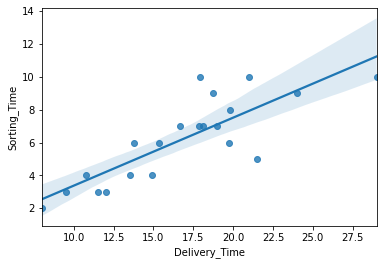

In [121]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data = delivery_data)

In [122]:
sm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           delivery_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.60e-07
Time:                        21:38:10   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
sorting_log     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
print(sm_model3.params)
print(sm_model3.pvalues)
print(sm_model3.tvalues)

Intercept      1.741987
sorting_log    0.597522
dtype: float64
Intercept      5.921137e-11
sorting_log    1.601539e-07
dtype: float64
Intercept      13.085552
sorting_log     8.024484
dtype: float64


In [128]:
print(sm_model3.rsquared,sm_model3.rsquared_adj)

0.77216134926874 0.7601698413355158


In [129]:
pred = sm_model3.predict(pd.DataFrame(delivery_data["Delivery_Time"]))

In [130]:
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [131]:
print(sm_model3.rsquared)    # r squared value

0.77216134926874
